In [ ]:
# DataFrame 1: Student Grades
import pandas as pd

data1 = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Math': [85, 90, 78, 92, 88, 95, 89, 79, 83, 91],
    'English': [78, 85, 88, 80, 92, 87, 90, 84, 79, 88],
    'Science': [90, 92, 85, 88, 94, 79, 83, 91, 87, 89]
}

df1 = pd.DataFrame(data1)

In [ ]:
# Exercise 1: Calculate the average grade for each student.

# Calculate average grade across subjects
df1['AverageGrade']=df1[['Math', 'English', 'Science']].mean(axis=1)

df1[['Student_ID', 'AverageGrade']]


In [ ]:
# Exercise 2: Find the student with the highest average grade.

# Calculate average grade
df1['Average']=df1[['Math', 'English', 'Science']].mean(axis=1)

# Find student with highest average
top_student=df1.loc[df1['Average'].idxmax()]

top_student


In [ ]:
# Exercise 3: Create a new column 'Total' representing the total marks obtained by each student.

# Calculate total marks
df1['Total'] = df1[['Math', 'English', 'Science']].sum(axis=1)

df1[['Student_ID', 'Total']]



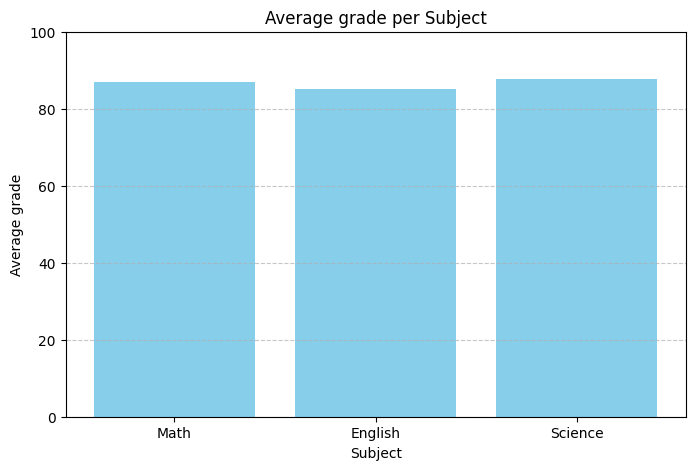

In [11]:
# Exercise 4: Plot a bar chart to visualize the average grades in each subject.

import matplotlib.pyplot as plt

# Calculate average grade per subject
subject_average=df1[['Math', 'English', 'Science']].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(subject_average.index, subject_average.values, color='skyblue')
plt.title('Average grade per Subject')
plt.xlabel('Subject')
plt.ylabel('Average grade')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [46]:
# DataFrame 2: Sales Data

import pandas as pd

data2 = {
    'Date': pd.date_range(start='2023-01-01', periods=10),
    'Product_A': [120, 150, 130, 110, 140, 160, 135, 125, 145, 155],
    'Product_B': [90, 110, 100, 80, 95, 105, 98, 88, 102, 112],
    'Product_C': [75, 80, 85, 70, 88, 92, 78, 82, 87, 90]
}

df2 = pd.DataFrame(data2)

In [47]:
# Exercise 1: Calculate the total sales for each product.

# Calculate total sales for each product
TotalSales=df2[['Product_A', 'Product_B', 'Product_C']].sum()

# Convert to DataFrame for cleaner output
total_sales_df=TotalSales.reset_index()
total_sales_df.columns=[['Product', 'TotalSales']]

total_sales_df

,Product,TotalSales
0,Product_A,1370
1,Product_B,980
2,Product_C,827


In [48]:
# Exercise 2: Find the date with the highest total sales.

# Calculate total sales per day
df2['TotalSales'] = df2[['Product_A', 'Product_B', 'Product_C']].sum(axis=1)

# Find the date with the highest total sales
max_sales_row = df2.loc[df2['TotalSales'].idxmax()]

max_sales_row[['Date', 'TotalSales']]

Date          2023-01-06 00:00:00
TotalSales                    357
Name: 5, dtype: object

In [49]:
# Exercise 3: Calculate the percentage change in sales for each product from the previous day.

# Set Date as index (optional but useful)
df2['Date']=pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

# Calculate percentage change
percentage_change=df2.pct_change()*100

# Round for cleaner output
percentage_change=percentage_change.round(2)

percentage_change

,Product_A,Product_B,Product_C,TotalSales
Date,,,,
2023-01-01,NaN,NaN,NaN,NaN
2023-01-02,25.00,22.22,6.67,19.30
2023-01-03,-13.33,-9.09,6.25,-7.35
2023-01-04,-15.38,-20.00,-17.65,-17.46
2023-01-05,27.27,18.75,25.71,24.23
2023-01-06,14.29,10.53,4.55,10.53
2023-01-07,-15.62,-6.67,-15.22,-12.89
2023-01-08,-7.41,-10.20,5.13,-5.14
2023-01-09,16.00,15.91,6.10,13.22


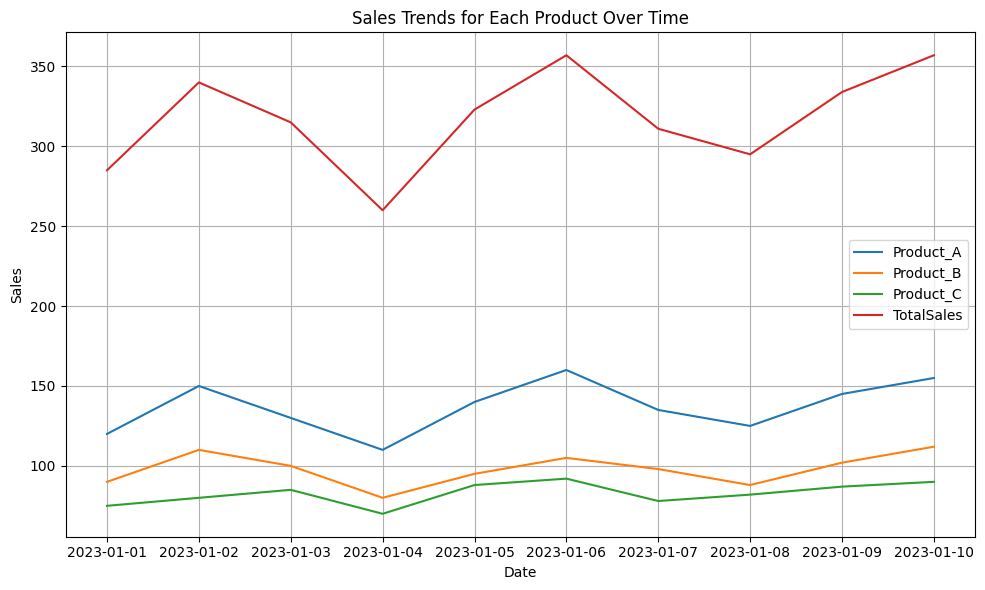

In [52]:
# Exercise 4: Plot a line chart to visualize the sales trends for each product over time.

import matplotlib.pyplot as plt


# Plot line chart
plt.figure(figsize=(10,6))
for product in df2.columns:
    plt.plot(df2.index, df2[product], label=product)

plt.title('Sales Trends for Each Product Over Time')
plt.xlabel('Date'),
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# DataFrame 3: Employee Information

import pandas as pd

data3 = {
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Department': ['HR', 'IT', 'Marketing', 'IT', 'Finance', 'HR', 'Marketing', 'IT', 'Finance', 'Marketing'],
    'Salary': [60000, 75000, 65000, 80000, 70000, 72000, 68000, 78000, 69000, 76000],
    'Experience (Years)': [3, 5, 2, 8, 4, 6, 3, 7, 2, 5]
}

df3 = pd.DataFrame(data3)

In [ ]:
# Exercise 1: Calculate the average salary for each department.

AverageSalary=df3.groupby('Department')['Salary'].mean().round(2)

AverageSalary

In [58]:
# Exercise 2: Find the employee with the most experience.

most_experienced=df3.loc[df3['Experience (Years)'].idxmax()]
most_experienced



Employee_ID             104
Name                  David
Department               IT
Salary                80000
Experience (Years)        8
Name: 3, dtype: object

In [61]:
# Exercise 3: Create a new column 'Salary Increase' representing the percentage increase in salary from the minimum salary in the dataframe.

# Find minimum salary
min_salary=df3['Salary'].min()

# Calculate percentage increase from the minimum salary
df3['Salary Increase']=((df3['Salary']-min_salary)/min_salary*100).round(2)

# Sort by Salary Increase
df3=df3.sort_values(by='Salary Increase', ascending=True)

df3[['Name', 'Salary', 'Salary Increase']]

,Name,Salary,Salary Increase
0,Alice,60000,0.00
2,Charlie,65000,8.33
6,Grace,68000,13.33
8,Ivy,69000,15.00
4,Emma,70000,16.67
5,Frank,72000,20.00
1,Bob,75000,25.00
9,Jack,76000,26.67
7,Hank,78000,30.00
3,David,80000,33.33


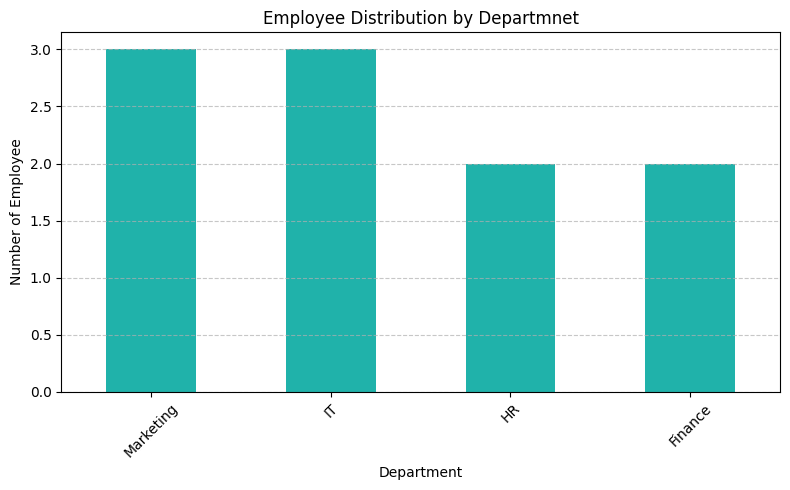

In [63]:
# Exercise 4: Plot a bar chart to visualize the distribution of employees across different departments.

import matplotlib.pyplot as plt

# Count number of employees per department
department_count=df3['Department'].value_counts()

# Plot bar char
plt.figure(figsize=(8,5))
department_count.plot(kind='bar', color='lightseagreen')
plt.title('Employee Distribution by Departmnet')
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [64]:
# DataFrame 4: Customer Orders

import pandas as pd

data4 = {
    'Order_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Customer_ID': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'Product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'A'],
    'Quantity': [2, 3, 1, 4, 2, 3, 2, 5, 1, 3],
    'Total_Price': [120, 180, 60, 240, 160, 270, 140, 300, 90, 180]
}

df4 = pd.DataFrame(data4)

In [67]:
# Exercise 1: Calculate the total revenue from all orders.

TotalRevenue=df4['Total_Price'].sum()

print(f"Total Revenue from all orders: ${TotalRevenue}")

Total Revenue from all orders: $1740


In [69]:
# Exercise 2: Find the most ordered product.

MostOrderedProduct=df4.groupby('Product')['Order_ID'].count().idxmax()
MostOrderedProduct

'A'

In [71]:
# Exercise 3: Calculate the average quantity of products ordered.

AvgQuantity=df4['Quantity'].mean()

print(f"✅ Average quantity of products ordered: {AvgQuantity:.2f}")


✅ Average quantity of products ordered: 2.60


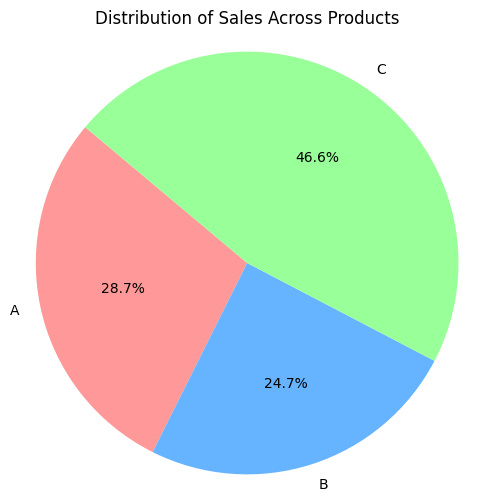

In [72]:
# Exercise 4: Plot a pie chart to visualize the distribution of sales across different products.

# Group by product and sum total sales
sales_by_product=df4.groupby('Product')['Total_Price'].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sales_by_product, labels=sales_by_product.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Sales Across Products')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle

plt.show()